# Level 2
---
### Task 1: Table Booking and Online Delivery

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('Dataset.csv')

#### Determine the percentage of restaurants that offer table booking and online delivery.

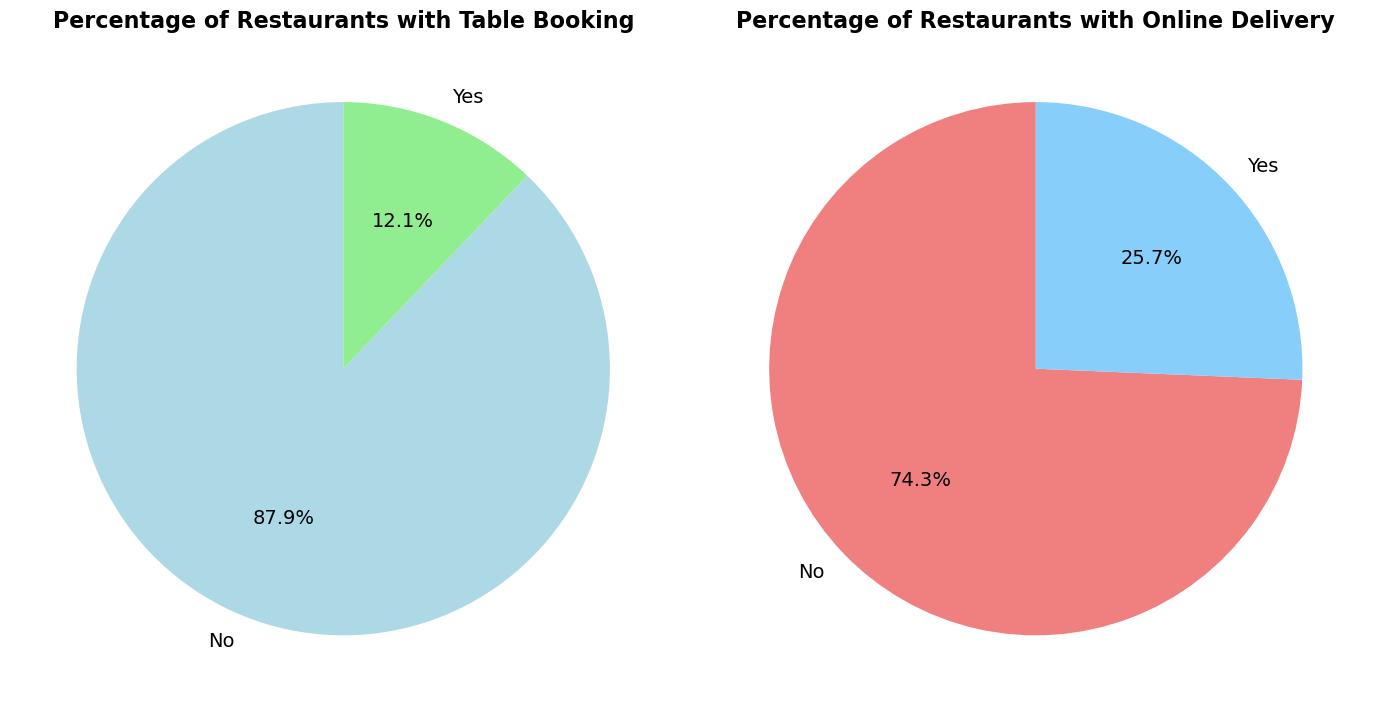

In [3]:
table_booking_dist = df['Has Table booking'].value_counts()
online_delivery_dist = df['Has Online delivery'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

axes[0].pie(table_booking_dist, labels=table_booking_dist.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
axes[0].set_title('Percentage of Restaurants with Table Booking', fontsize=16, fontweight='bold')
for label in axes[0].texts:
    label.set_fontsize(14)

axes[1].pie(online_delivery_dist, labels=online_delivery_dist.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
axes[1].set_title('Percentage of Restaurants with Online Delivery', fontsize=16, fontweight='bold')
for label in axes[1].texts:
    label.set_fontsize(14)

plt.tight_layout()
plt.show()


#### Compare the average ratings of restaurants with table booking and those without.

Has Table booking
No     2.559359
Yes    3.441969
Name: Aggregate rating, dtype: float64


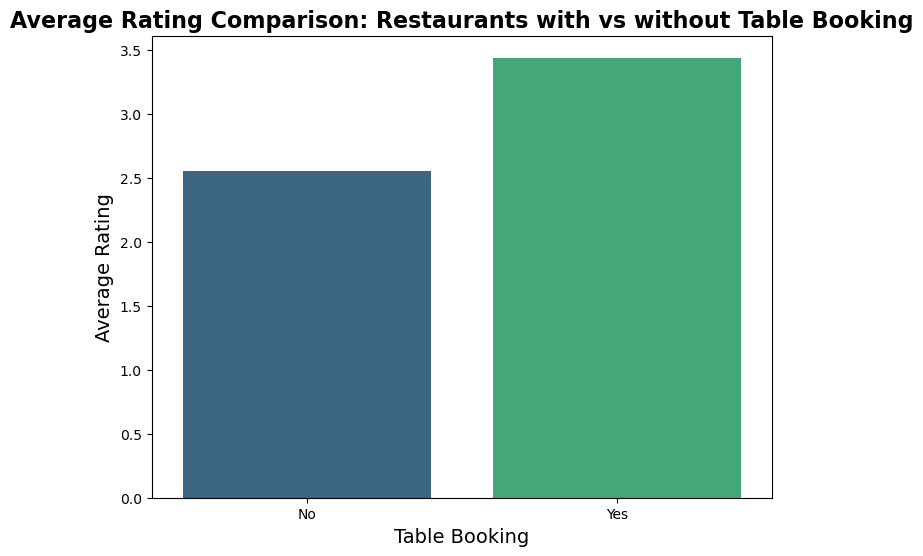

In [4]:
avg_rating_table_booking = df.groupby('Has Table booking')['Aggregate rating'].mean()

print(avg_rating_table_booking)

plt.figure(figsize=(8, 6))
sns.barplot(x=avg_rating_table_booking.index, y=avg_rating_table_booking.values, hue=avg_rating_table_booking.index, palette='viridis', legend=False)
plt.title('Average Rating Comparison: Restaurants with vs without Table Booking', fontsize=16, fontweight='bold')
plt.xlabel('Table Booking', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.xticks(rotation=0)
plt.show()


#### Analyze the availability of online delivery among restaurants with different price ranges.

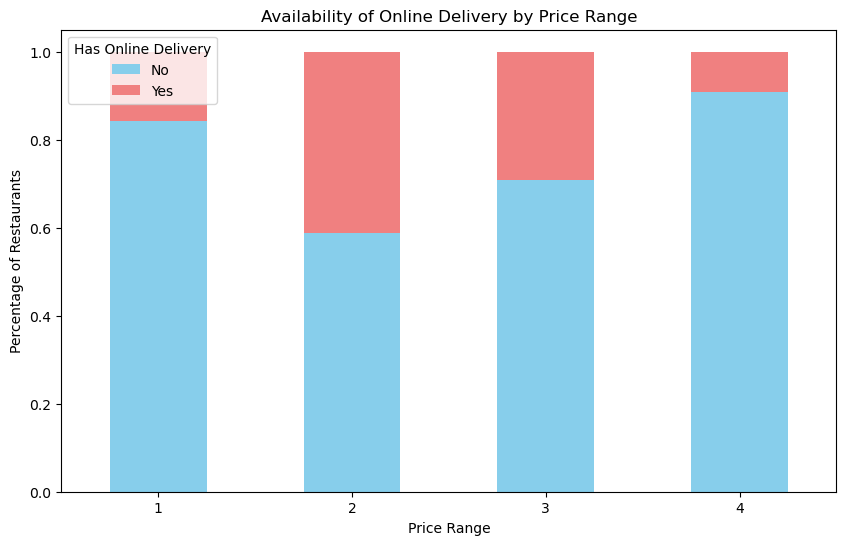

In [5]:
online_delivery_by_price = df.groupby('Price range')['Has Online delivery'].value_counts(normalize=True).unstack().fillna(0)

online_delivery_by_price.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'lightcoral'])

plt.title('Availability of Online Delivery by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Percentage of Restaurants')
plt.xticks(rotation=0)
plt.legend(title='Has Online Delivery', labels=['No', 'Yes'])
plt.show()


---
### Task 2: Price Range Analysis
#### Determine the most common price range among all the restaurants.

In [6]:
price_range_counts = df['Price range'].value_counts()

most_common_price_range = price_range_counts.idxmax()
most_common_count = price_range_counts.max()

print(f"The most common price range is {most_common_price_range} with {most_common_count} restaurants.")


The most common price range is 1 with 4444 restaurants.


#### Calculate the average rating for each price range.


In [7]:
avg_rating_by_price_range = df.groupby('Price range')['Aggregate rating'].mean()
avg_rating_by_price_range

Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64

#### Identify the color that represents the highest average rating among different price ranges.

In [8]:
highest_avg_rating_price_range = avg_rating_by_price_range.idxmax()
color_for_highest_rating = df[df['Price range'] == highest_avg_rating_price_range]['Rating color'].mode()[0]

print(f"The highest average rating is for price range '{highest_avg_rating_price_range}' with color '{color_for_highest_rating}'.")


The highest average rating is for price range '4' with color 'Yellow'.


---
### Task 3: Feature Engineering
#### Extract additional features from the existing columns, such as the length of the restaurant name or address.

In [9]:
df['Restaurant Name Length'] = df['Restaurant Name'].str.len()
df[['Restaurant Name', 'Restaurant Name Length']].head()

,Restaurant Name,Restaurant Name Length
0,Le Petit Souffle,16
1,Izakaya Kikufuji,16
2,Heat - Edsa Shangri-La,22
3,Ooma,4
4,Sambo Kojin,11


In [10]:
df['Address Length'] = df['Address'].str.len()
df[['Address', 'Address Length']].head()

,Address,Address Length
0,"Third Floor, Century City Mall, Kalayaan Avenu...",71
1,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...",67
2,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...",56
3,"Third Floor, Mega Fashion Hall, SM Megamall, O...",70
4,"Third Floor, Mega Atrium, SM Megamall, Ortigas...",64


#### Create new features like "Has Table Booking" or "Has Online Delivery" by encoding categorical variables.

In [11]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Restaurant Name Length', 'Address Length'],
      dtype='object')

In [12]:
label_encoder = LabelEncoder()

# Encoding 'Has Table booking' (Yes = 1, No = 0)
df['Has Table booking Encoded'] = label_encoder.fit_transform(df['Has Table booking'])

# Encoding 'Has Online delivery' (Yes = 1, No = 0)
df['Has Online delivery Encoded'] = label_encoder.fit_transform(df['Has Online delivery'])

print(df[['Has Table booking', 'Has Table booking Encoded', 'Has Online delivery', 'Has Online delivery Encoded']].head().to_string(index=False))

Has Table booking  Has Table booking Encoded Has Online delivery  Has Online delivery Encoded
              Yes                          1                  No                            0
              Yes                          1                  No                            0
              Yes                          1                  No                            0
               No                          0                  No                            0
              Yes                          1                  No                            0


In [13]:
# Dropping the columns after encoding:
df.drop(['Has Table booking','Has Online delivery'], axis=1, inplace=True)

In [14]:
df.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Restaurant Name Length,Address Length,Has Table booking Encoded,Has Online delivery Encoded
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,3,4.8,Dark Green,Excellent,314,16,71,1,0
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,3,4.5,Dark Green,Excellent,591,16,67,1,0
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,No,4,4.4,Green,Very Good,270,22,56,1,0
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,4,4.9,Dark Green,Excellent,365,4,70,0,0
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,No,4,4.8,Dark Green,Excellent,229,11,64,1,0
